# Read directly from the UNFCCC Data Inventory

The UNFCCC hosts a public [Data Inventory](https://di.unfccc.int) of national greenhouse gas emissions.
The inventory has a flexible API to retrieve the data, and the Python package [unfccc-di-api](https://unfccc-di-api.readthedocs.io) provides an elegant wrapper to query the API.

The **pyam** package uses this API and package to retrieve the data and cast it to an **IamDataFrame**
using variable names similar to the structure used in the IPCC process and IAM comparison projects.

<div class="alert alert-warning">

Read the UNFCCC Data Inventory [FAQ](https://unfccc.int/process-and-meetings/transparency-and-reporting/greenhouse-gas-data/frequently-asked-questions#eq-3) to learn more about the sources of the data
and the conditions for using it in own work,  
most importantly the request to cite the UNFCCC and other sources.

</div>

This notebook was run with Python 3.8 and GAMS 33.2 on Mac OS.

****

**Developers note:**
To reduce the load on Read The Docs, this notebook is not executed by **nbsphinx**
and has to be saved with output.

In [1]:
import pyam

<IPython.core.display.Javascript object>

## Query the UNFCCC Data Inventory

In [2]:
df = pyam.read_unfccc(party_code='DEU', gases=['CH4'], tier=1)
df

<class 'pyam.core.IamDataFrame'>
Index dimensions:
 * model    : UNFCCC (1)
 * scenario : Data Inventory (1)
Timeseries data coordinates:
   region   : DEU (1)
   variable : Emissions|CH4|Agriculture, Emissions|CH4|Energy, ... Emissions|CH4|Waste (5)
   unit     : kt CH4 (1)
   year     : 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, ... 2018 (29)
Meta indicators:
   exclude (bool) False (1)

## Convert emissions to CO2-equivalent using a specific IPCC metric

**pyam** provides an endogenous feature to convert emissions species using a specific GWP metric.
Take a look at [this tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/unit_conversion.html#4.-Use-contexts-to-specify-conversion-metrics) to learn more!

In [3]:
df.convert_unit('kt CH4', 'Mt CO2e', context='AR4GWP100', inplace=True)

## Plot the data

Visit the [plotting gallery](https://pyam-iamc.readthedocs.io/en/stable/gallery/index.html)
to see the range of visualization options native to **pyam**!

<AxesSubplot:title={'center':'model: UNFCCC scenario: Data Inventory region: DEU'}, xlabel='Year', ylabel='Mt CO2e'>

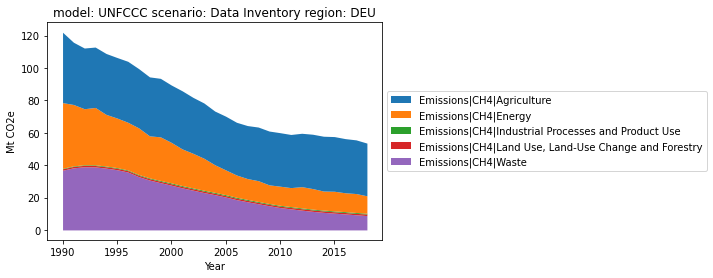

In [4]:
df.plot.stack()